In [ ]:
# Q1: Signal Events Summary

N = 6
events_input = [
    ("spike", 3, 3),
    ("noise", 1, 5),
    ("spike", 2, 3),
    ("pulse", 4, 1),
    ("noise", 2, 2),
    ("pulse", 3, 2)
]

# Store events as list of tuples 
events = [(label, amp, dur) for label, amp, dur in events_input]

summary = {}

for label, amp, dur in events:
    if label not in summary:
        summary[label] = {"total_dur": 0, "total_energy": 0}
    summary[label]["total_dur"] += dur
    summary[label]["total_energy"] += amp * amp * dur

# Sort by label
sorted_labels = sorted(summary.keys())

for label in sorted_labels:
    print(label, summary[label]["total_dur"], summary[label]["total_energy"])

# Find label with maximum energy
top_label = min(
    summary.keys(),
    key=lambda x: (-summary[x]["total_energy"], x)
)

print("TOP", top_label, summary[top_label]["total_energy"])


noise 7 13
pulse 3 34
spike 6 39
TOP spike 39


In [1]:
import numpy as np

# Input data
A = np.array([
    [78, 85, 69],
    [88, 90, 92],
    [55, 60, 58],
    [30, 40, 35]
])

max_marks = np.array([100, 100, 100])
K = 2

# Normalize → Percentage
P = 100 * A / max_marks
print("Percentage Matrix:\n", P)

# Student summary
avg = np.mean(P, axis=1)
best_sub = np.argmax(P, axis=1)

print("Student Averages:", avg)
print("Best Subject per Student:", best_sub)

# Subject summary
sub_mean = np.mean(P, axis=0)
top_student = np.argmax(P, axis=0)

print("Subject Means:", sub_mean)
print("Top Student per Subject:", top_student)

# Best K students
top_k = np.argsort(avg)[-K:][::-1]
print("Top K Students:", top_k)

# Grade mapping
grades = np.empty(P.shape, dtype=str)

grades[P >= 80] = 'A'
grades[(P >= 60) & (P < 80)] = 'B'
grades[(P >= 40) & (P < 60)] = 'C'
grades[P < 40] = 'D'

unique, counts = np.unique(grades, return_counts=True)

print("Grade Counts:")
for u, c in zip(unique, counts):
    print(u, c)


Percentage Matrix:
 [[78. 85. 69.]
 [88. 90. 92.]
 [55. 60. 58.]
 [30. 40. 35.]]
Student Averages: [77.33333333 90.         57.66666667 35.        ]
Best Subject per Student: [1 2 1 1]
Subject Means: [62.75 68.75 63.5 ]
Top Student per Subject: [1 1 1]
Top K Students: [1 0]
Grade Counts:
A 4
B 3
C 3
D 2


In [2]:
class Student:
    uni_name = "BUET"
    
    def __init__(self, name, sid):
        self.name = name
        self.sid=sid
        self.grades = []

    def add_grade(self, grade):
        self.grades.append(grade)

    def get_average(self):
        return sum(self.grades)/len(self.grades)
    
    def get_letter_grade(self):
        avg = self.get_average()
        if avg>=80:
            return 'A'
        elif avg >=60:
            return 'B'
        elif avg>=40:
            return 'C'
        else:
            return 'D'
        
    def __str__(self):
        return f"{self.name} ({self.sid} | avg: {self.get_average(): .2f} | Grade: {self.get_letter_grade()})"
    
    
students = [
    Student("A", 1),
    Student("B", 2),
    Student("C", 3),
    Student("D", 4),
    Student("E", 5)
]

grades_data = [
    [85, 90, 88],
    [70, 65, 72],
    [55, 50, 60],
    [30, 35, 40],
    [95, 92, 93]
]

for s, g_list in zip(students, grades_data):
    for g in g_list:
        s.add_grade(g)
    print(s)

A (1 | avg:  87.67 | Grade: A)
B (2 | avg:  69.00 | Grade: B)
C (3 | avg:  55.00 | Grade: C)
D (4 | avg:  35.00 | Grade: D)
E (5 | avg:  93.33 | Grade: A)


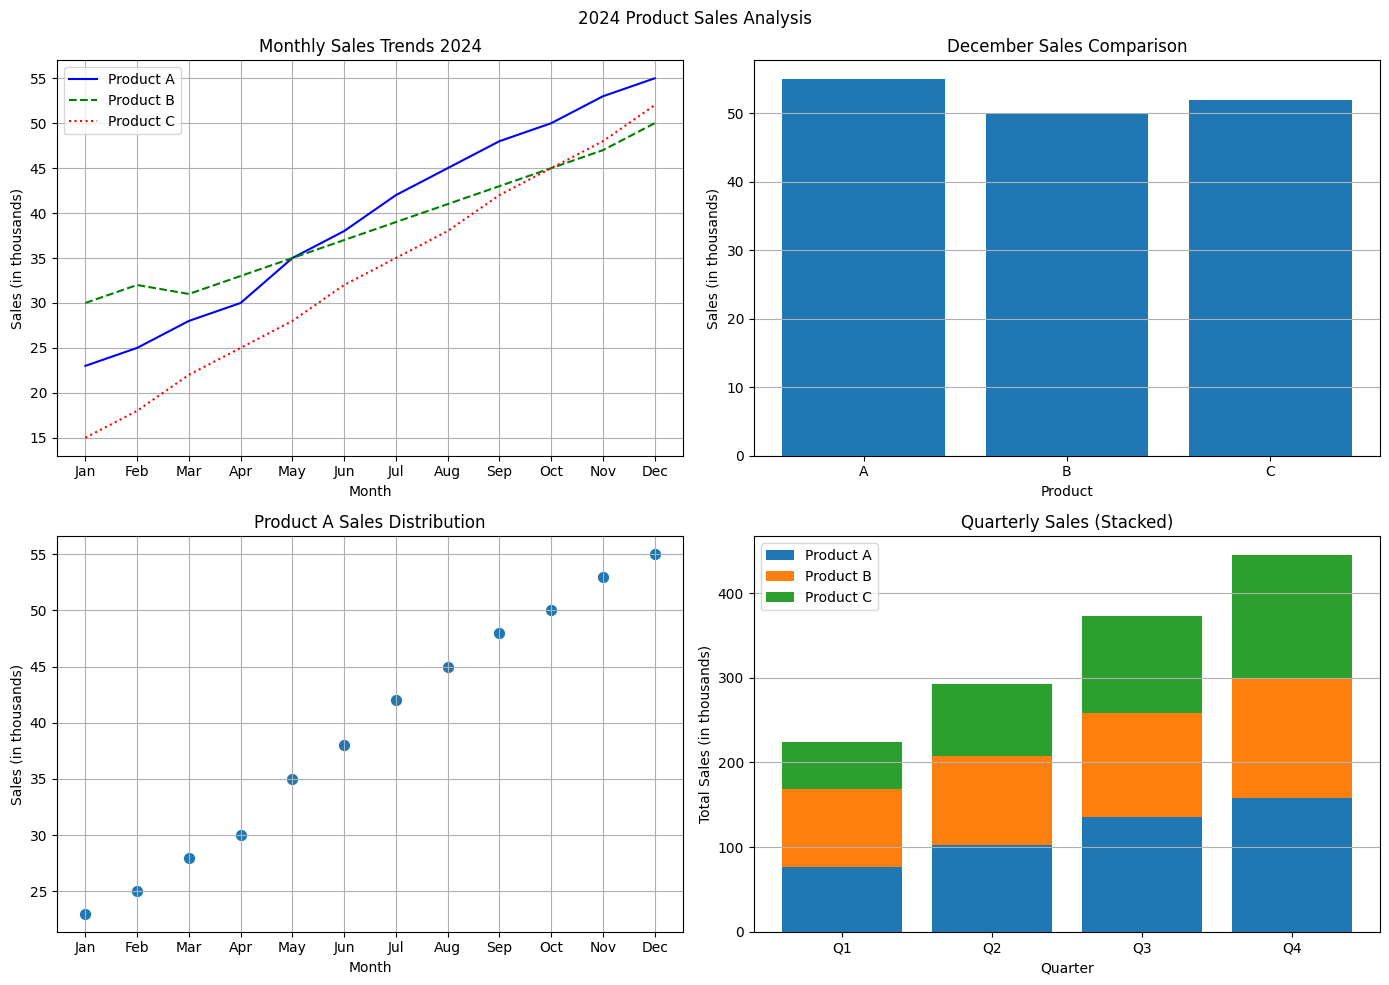

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

product_a = np.array([23,25,28,30,35,38,42,45,48,50,53,55])
product_b = np.array([30,32,31,33,35,37,39,41,43,45,47,50])
product_c = np.array([15,18,22,25,28,32,35,38,42,45,48,52])

plt.figure(figsize=(14,10))

# Plot 1: Line plot
plt.subplot(2,2,1)
plt.plot(months, product_a, linestyle='-', color='blue', label='Product A')
plt.plot(months, product_b, linestyle='--', color='green', label='Product B')
plt.plot(months, product_c, linestyle=':', color='red', label='Product C')
plt.title("Monthly Sales Trends 2024")
plt.xlabel("Month")
plt.ylabel("Sales (in thousands)")
plt.legend()
plt.grid(True)

# Plot 2: Bar chart
plt.subplot(2,2,2)
plt.bar(['A','B','C'], [product_a[-1], product_b[-1], product_c[-1]])
plt.title("December Sales Comparison")
plt.xlabel("Product")
plt.ylabel("Sales (in thousands)")
plt.grid(axis='y')

# Plot 3: Scatter plot
plt.subplot(2,2,3)
plt.scatter(months, product_a, s=50)
plt.title("Product A Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Sales (in thousands)")
plt.grid(True)

# Plot 4: Stacked bar chart
plt.subplot(2,2,4)
quarters = ['Q1','Q2','Q3','Q4']

qa = [product_a[:3].sum(), product_a[3:6].sum(), product_a[6:9].sum(), product_a[9:].sum()]
qb = [product_b[:3].sum(), product_b[3:6].sum(), product_b[6:9].sum(), product_b[9:].sum()]
qc = [product_c[:3].sum(), product_c[3:6].sum(), product_c[6:9].sum(), product_c[9:].sum()]

plt.bar(quarters, qa, label='Product A')
plt.bar(quarters, qb, bottom=qa, label='Product B')
plt.bar(quarters, qc, bottom=np.array(qa)+np.array(qb), label='Product C')

plt.title("Quarterly Sales (Stacked)")
plt.xlabel("Quarter")
plt.ylabel("Total Sales (in thousands)")
plt.legend()
plt.grid(axis='y')

plt.suptitle("2024 Product Sales Analysis")
plt.tight_layout()
plt.show()
